In [11]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
from minisom import MiniSom
import LVQ
from pylab import bone, pcolor, colorbar, plot, show
from supervisedSom import supervisedSom

In [12]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [13]:
# Training the SOM
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [14]:
suso = supervisedSom(som, x_train, y_train)

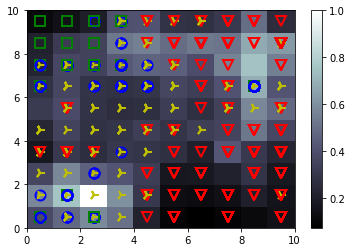

In [15]:
labels = suso.visualSom()

In [16]:
propa = suso.propabilitySom()

In [17]:
taggings = suso.taggingSom()

In [18]:
def predict(test_vector, p, taggings, labels):
    position = find_closest(test_vector, p, labels)
    return taggings[position[0], position[1]]

In [19]:
predicted_y1 = [suso.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        54
          1       1.00      0.83      0.90        23
          2       0.44      0.88      0.58         8
          3       0.91      0.85      0.88        47

avg / total       0.92      0.89      0.90       132



In [20]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [suso.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       558
          1       0.89      0.71      0.79       165
          2       0.47      0.70      0.56       139
          3       0.87      0.75      0.80       453

avg / total       0.85      0.83      0.83      1315

